# COGS 108 - Final Project (Group 7)

# Overview

*Fill in your overview here*

# Names and Members IDs

- Purisa Jasmine Simmons - A12802561
- Eryue Xu - A15122722
- Bar Yosef - A13368857
- Jing Lang - A14906233
- Sao I Chan - A15720032
- Jasmine Palafox - A14052116


# Research Question

The main question that we would like to explore is:
What is the relationship between an adult population’s awareness of climate change and
the amount of greenhouse gases released by that population’s region?
In order to develop an answer this question, we will also explore the following sub-questions:
- How does public awareness of climate change vary by state within the U.S.?
- How have greenhouse gas emissions in the United States changed over time, using data
collected from the following years: 2014, 2016, 2018?
- Does a state’s overall political lean (more Democrat or Republican) affect that state’s adult
population’s concern for climate change?
- On a global scale, how do greenhouse gas emissions vary by country? Is there a correlation
between a country’s greenhouse gas emissions and their awareness of climate change?

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


We hypothesize that regions with a greater awareness of climate change will produce lower
amounts of greenhouse gases emissions, when compared to regions with lesser degrees of
climate change awareness, especially when the industrialization of the region under study is
controlled for. This hypothesis is based on the idea that a public awareness of climate change
would cause local governments to produce policy that addresses climate change by regulating
greenhouse gas emissions (Bord, O’Connor, & Fisher, 2000).

# Dataset(s)

We have nine datasets that we are using in our final project. We will analyze the data contained in these nine datasets in order to guide the analysis of our research questions.

Dataset 1
- Dataset Name: YPCCC_2014_State.csv
- Link to the dataset: https://climatecommunication.yale.edu/visualizations-data/ycom/
- Number of observations: 51 states

Dataset 2

- Dataset Name: YCOM_2016.csv
- Link to the dataset: https://climatecommunication.yale.edu/visualizations-data/ycom-us-2016/?est=happening&type=value&geo=county
- Number of observations: 51 states

Dataset 3

- Dataset Name: YCOM_2018.csv
- Link to the dataset: https://climatecommunication.yale.edu/visualizations-data/ycom-us-2018/?est=happening&type=value&geo=county
- Number of observations: 51 states

These thress datasets come from the study on climate change awareness conducted by the Yale Program on Climate Change Communication. It gives us information related to a geographic variation in opinions of climate change, organized at the level of county and/or state including the following categories: beliefs, risk perceptions, policy support, behaviors, awareness, worried, etc.

Dataset 4

- Dataset Name: Carbon_dioxide_emission_by_state.xlsx
- Link to the dataset: https://www.eia.gov/environment/emissions/state/analysis/
- Number of observations: 51 states

This dataset contains the data related to the carbon dioxide emission level by state from 2005 to 2016. 

Dataset 5

- Dataset Name: State_Party_Affiliation_2014.csv
- Link to the dataset: https://www.pewforum.org/religious-landscape-study/compare/party-affiliation/by/state/
- Number of observations: 51 states * 4 columns = 204 observations

This dataset contains information related to the political party affiliation of each state in 2014 based on a subsample of each state's population. 

Dataset 6

- Dataset Name: 2014_State_Size_Population_Density.csv
- Link to the dataset: https://www.states101.com/populations
- Number of observations: 57 states * 3 columns = 171 observations

This dataset contains information for the population, land area in square miles, and population density (people per square mile) of each U.S. state and territory. 

Dataset 7

- Dataset Name: GreenhouseGasInventoryDataUS.csv
- Link to the dataset: https://cfpub.epa.gov/ghgdata/inventoryexplorer/
- Number of observations: We have 27 years data

This dataset contains the total amount of each category of gases in U.S. from 1990 to 2017 including carbon dioxide, methane, nitrous oxide, and fluorinated gases. 

Dataset 8

- Dataset Name: annual_co2_emissions_per_country.csv
- Link to the dataset: https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions#per-capita-co2-emiss
- Number of observations: For each country, there are 265 years data is collected. 

This dataset describes the annual CO2 and other greenhouse gas emissions per country globally, starting from 1751 until 2016, measured in tonnes per year.

Dataset 9

- Dataset Name: awareness_by_percentage.xlsx
- Link to the dataset: https://www.nature.com/articles/nclimate2728
- Number of observations: 119 countries in the dataset

This dataset contains datas that can help us to analyze the relationship between different categories and people's level of awareness of climate change.

# Setup

In [1]:
#Import Necessary Python Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import operator
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Data Cleaning

Describe your data cleaning steps here.

#### Dataset 1: Read in data about population sentiment per state in 2014 (for Simmons Analysis) 

In [2]:
#File names and datasets 
#YPCCC_2014_State.csv - Yale Study conducted in 2014 w/ population sentiments of climate change
df_YPCCC_2014_State = pd.read_csv("Datasets/YPCCC_2014_State.csv")

#Choose which columns from the original dataset to keep: 
columns_keep = ['Statecode', 'Statename', 'TotalPop', 'happening', 'human', 'worried', 'personal', 'CO2limits', 'regulate', 'fundrenewables']
df_YPCCC_2014_State_new = df_YPCCC_2014_State[columns_keep]

#Drop District of Columbia: 
df_YPCCC_2014_State_new = df_YPCCC_2014_State_new[df_YPCCC_2014_State_new.Statecode != "DC"]
df_YPCCC_2014_State_new

,Statecode,Statename,TotalPop,happening,human,worried,personal,CO2limits,regulate,fundrenewables
0,AK,Alaska,447543,62,45,48,29,48,67,76
1,AL,Alabama,3166424,56,43,46,31,53,69,73
2,AR,Arkansas,1921039,57,44,47,31,59,71,73
3,AZ,Arizona,4149955,64,49,54,38,64,74,76
4,CA,California,24117317,70,55,62,42,72,79,79
5,CO,Colorado,3328869,66,50,55,36,66,76,78
6,CT,Connecticut,2431340,66,51,56,37,70,78,79
8,DE,Delaware,603331,65,50,55,36,64,77,79
9,FL,Florida,13127624,64,50,54,38,62,75,77
10,GA,Georgia,6242508,63,48,52,36,60,74,75


#### Dataset 2: Read in data about awareness of climate change in 2016

In [3]:
#import dataset
df_YCOM_2016 = pd.read_csv("Datasets/YCOM_2016.csv")

#Specify which columns in 2016 data we would like to keep in the dataframe for our analysis
columns_2016_keep = ['GeoName', 'happening', 'human', 'worried', 'personal', 'CO2limits', 
                     'regulate', 'fundrenewables']
df_YCOM_2016_new = df_YCOM_2016[columns_2016_keep]
df_YCOM_2016_state = df_YCOM_2016_new.loc[0:51]
df_YCOM_2016_state = df_YCOM_2016_state.drop(index = 0)
df_YCOM_2016_state.dropna()
df_YCOM_2016_state = df_YCOM_2016_state[df_YCOM_2016_state.GeoName != "District of Columbia"]
#df_YCOM_2016_state

#### Dataset 3: Read in data about awareness of climate change in 2018

In [4]:
#import dataset
df_YCOM_2018 = pd.read_csv("Datasets/YCOM_2018.csv", encoding='ISO-8859-1')

#### Dataset 4: Read in data about carbon dioxide emission per state (for Simmons Analysis)

In [5]:
#Carbon_dioxide_emission_by_state.xlsx - Carbon Dioxide per state from years 2005-2016
df_CO2_state = pd.read_excel("Datasets/Carbon_dioxide_emission_by_state.xlsx")

#Drop NaN values and rename columns with proper years for 2012, 2014, and 2016 data
col_years = ['State']
for year in list(range(2005, 2017)):
    col_years.append(str(year))

col_years.append('Percent Change')
col_years.append('Absolute')

df_CO2_state.columns=col_years

#Deleting unnecessary rows from beginning, renaming index to be the state names:
new_df_CO2_state = df_CO2_state.iloc[4:55]
new_df_CO2_state = new_df_CO2_state.set_index('State')

#Right now, only concerned with year 2014:
df_CO2_state_2014 = pd.DataFrame(new_df_CO2_state[:]['2014'])
df_CO2_state_2014.columns=(["CO2_Emissions_in_2014"])


#Drop District of Columbia: 
df_CO2_state_2014 = df_CO2_state_2014.drop("District of Columbia", axis=0)
#df_CO2_state_2014

df_CO2_state2 = pd.read_excel("Datasets/Carbon_dioxide_emission_by_state.xlsx", header=4)
df_CO2_state2_dropped = df_CO2_state2.dropna()
## only keep the data from 2012, 2014, 2016
columns_CO2 = ['State',2012, 2014, 2016]
df_CO2_state_keep = df_CO2_state2_dropped[columns_CO2]
df_CO2_state_keep = df_CO2_state_keep.drop(51, axis = 0)
#Drop District of Columbia: 
df_CO2_state_keep = df_CO2_state_keep[df_CO2_state_keep.State != "District of Columbia"]
df_CO2_state_keep.columns = ['State', '2014', '2016', '2018']
#df_CO2_state_keep

#### Dataset 5: Read in data about state party affiliations for 2014 (for Simmons Analysis)

In [6]:
df_party_state = pd.read_csv("Datasets/State_Party_Affiliation_2014.csv")
df_party_state = df_party_state.set_index("State")
df_party_state.columns=["Republican", "No_lean", "Democrat", "Sample_Size"]
df_party_state.Republican = df_party_state.Republican.apply(lambda x: x.replace('%',''))
df_party_state.No_lean = df_party_state.No_lean.apply(lambda x: x.replace('%',''))
df_party_state.Democrat = df_party_state.Democrat.apply(lambda x: x.replace('%',''))
df_party_state

#Drop the district of columbia since it isn't a state: 
df_party_state = df_party_state.drop("District of Columbia")
df_party_state




,Republican,No_lean,Democrat,Sample_Size
State,,,,
Alabama,52,13,35,511
Alaska,39,29,32,310
Arizona,40,21,39,653
Arkansas,46,16,38,311
California,30,21,49,"3,697"
Colorado,41,17,42,504
Connecticut,32,18,50,377
Delaware,29,17,55,301
Florida,37,19,44,"2,020"


#### Dataset 7: Read in data about annual greenhouse gas in US

In [7]:
#import greenhouse gas data
annual_gas_us = pd.read_csv('Datasets/GreenhouseGasInventoryDataUS.csv')

#Dataset in the different orientation
#Transpose the dataset and rename the column
annual_gas_us = annual_gas_us.set_index('Gas').rename_axis(['Year']).transpose().reset_index()
annual_gas_us.rename(columns = {'index' : 'Year'}, inplace = True)

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

#### Step \#1: First, we graph the annual greenhouse gas in US from 1990 to 2017

Text(0.5, 1.0, 'Annual Greenhouse Gas in US - 1990 to 2017')

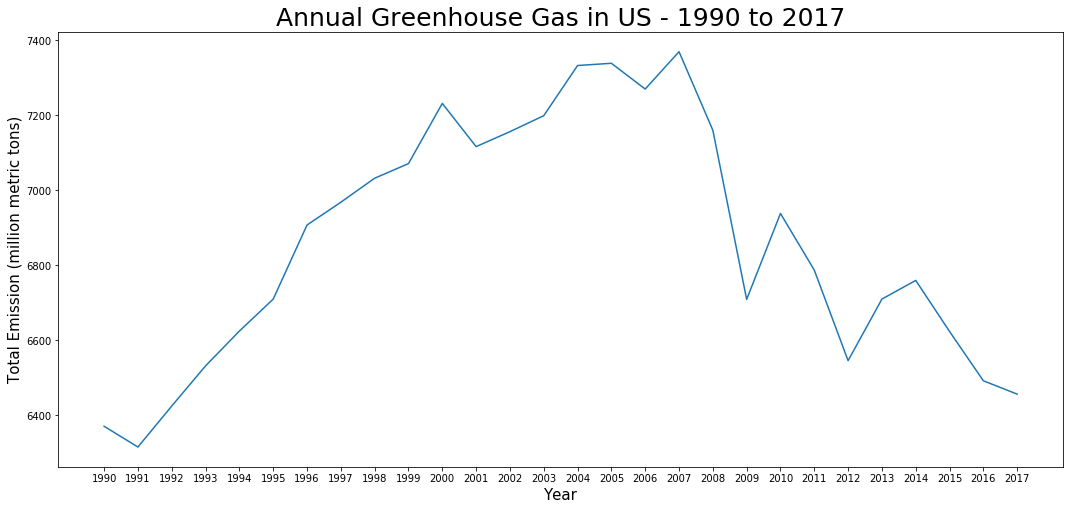

In [8]:
#Plot the diagram to show annual greenhouse gas in US over the year
f = plt.figure(figsize = (18,8))
ax = f.add_subplot(1,1,1)
ax.plot(annual_gas_us['Year'], annual_gas_us['Total'])
ax.set_xlabel('Year', size = 15)
ax.set_ylabel('Total Emission (million metric tons)', size = 15)
ax.set_title('Annual Greenhouse Gas in US - 1990 to 2017', size = 25)

The diagram above shows the changes of annual greenhous gas in US from 1990 to 2017. We can easily notice that the changes are significant. The emission amount increased rapidly started from 1991 until 1999. And there is a peak in 2000 and the emission goes down again and keep constantly increasing until 2007. Starting from 2007, the emission amount got controlled and decreased rapidly within 2 years and keep under controlled.

#### Step \#2: Next, we graph the greenhouse gas by category

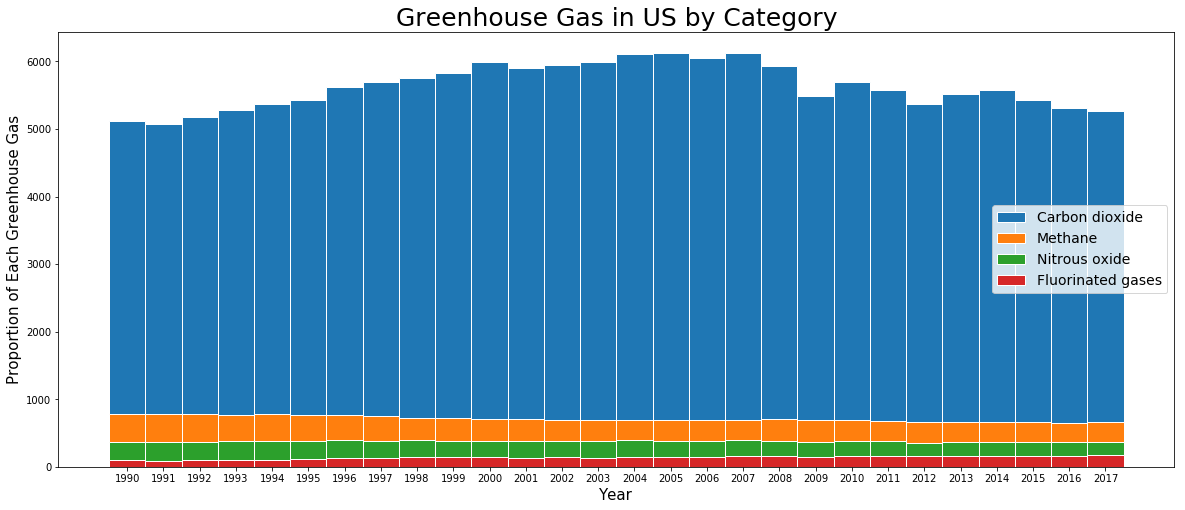

In [9]:
#Generate barplot to show emission in US over year by category
f = plt.figure(figsize = (20,8))
ax = f.add_subplot(1,1,1)
bars = max(annual_gas_us['Total'])
r = annual_gas_us['Year']
barWidth = 1

plt.bar(r, annual_gas_us['Carbon dioxide'], edgecolor = 'white', width = barWidth, label = 'Carbon dioxide')
plt.bar(r, annual_gas_us['Methane'], edgecolor = 'white', width = barWidth, label = 'Methane')
plt.bar(r, annual_gas_us['Nitrous oxide'], edgecolor = 'white', width = barWidth, label = 'Nitrous oxide')
plt.bar(r, annual_gas_us['Fluorinated gases'], edgecolor = 'white', width = barWidth, label = 'Fluorinated gases')

plt.xlabel('Year', size = 15)
plt.ylabel('Proportion of Each Greenhouse Gas', size = 15)
plt.title('Greenhouse Gas in US by Category', size = 25)
plt.legend(loc = 5, prop = {'size': 14})

The barplot shows the proportion of each greenhouse gas from 1990 to 2017. And we can observe that the proportion of carbon dioxide are the highest among these four greenhous gas categories in every year.

### Hypothesis \#1: In this analysis, we're wondering whether the awareness of climate change affects their carbon dioxide emissions. We hypothesize that higher awareness of climate change will have lower carbon dioxide emissions. And vice versa.

In [10]:
#sort the dataset in descending order
sort_state_2014 = df_YPCCC_2014_State_new.sort_values(by = ['happening'], ascending = False)

Text(0.5, 1.0, 'Awareness of Climate Change in US - 2014')

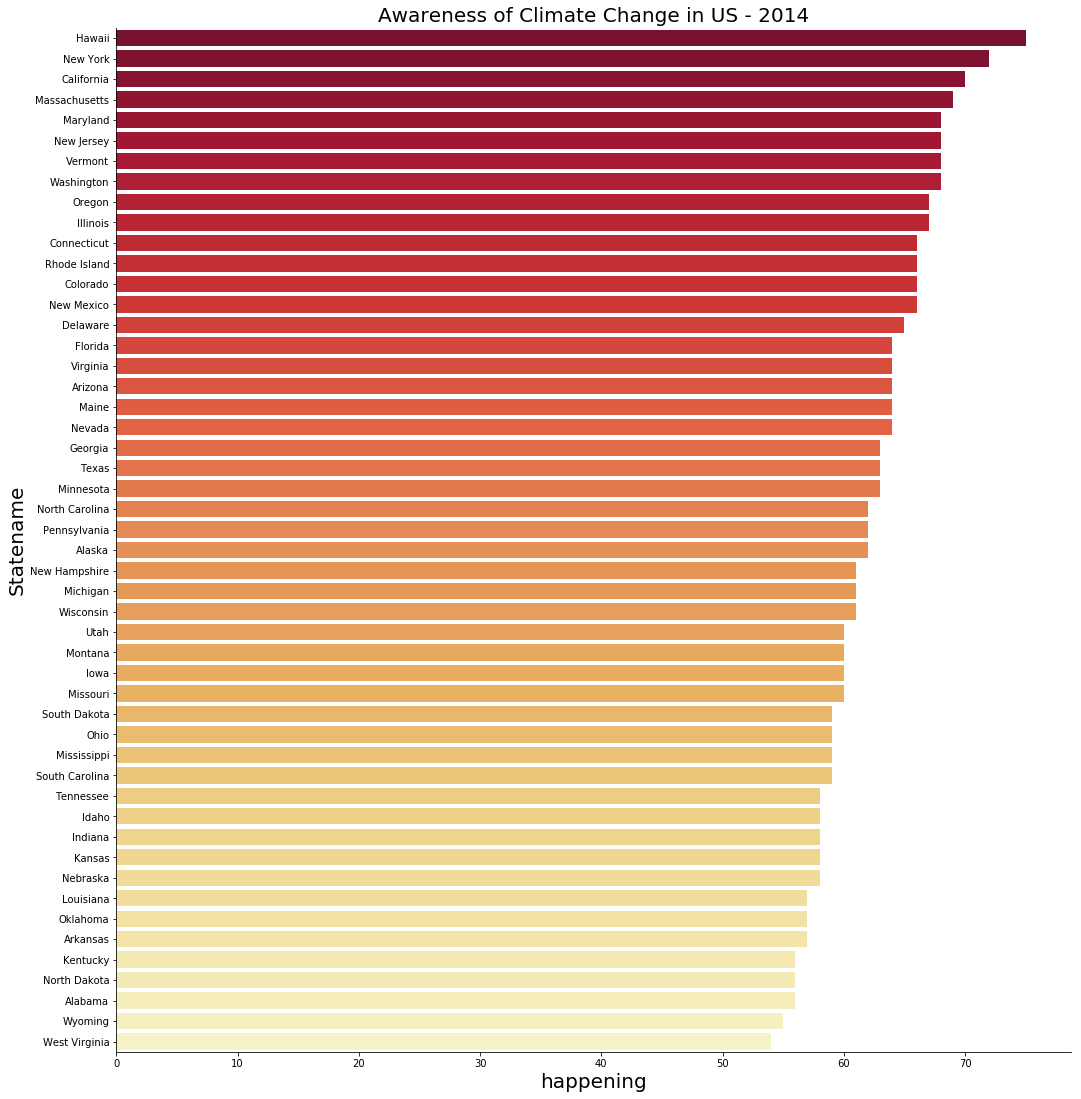

In [11]:
#plot awareness states
sc = sns.color_palette("YlOrRd", 51)
sc.reverse()
sns.catplot(x = 'happening', y = 'Statename', kind = 'bar', palette = sc, data = sort_state_2014, height = 15)
plt.xlabel('happening', size = 20)
plt.ylabel('Statename', size = 20)
plt.title('Awareness of Climate Change in US - 2014', size = 20)

We can observe that the highest awareness of climate change state is Hawaii, and the lowest awareness of climate change state is West Virginia. Next, we will extract top 10 and least 10 states.

In [12]:
#store top 10 awareness states
top10_aware_2014 = sort_state_2014.head(10)

#store least 10 awareness states
least10_aware_2014 = sort_state_2014.tail(10)

#### Next, we need both the same top10 and least10 awareness states in 2014 from the dataset 2016 in order to compare

In [13]:
#extract top10 awareness states in 2014 from the dataset 2016
df_sametopstate_2016 = pd.DataFrame([])
for index, rows in df_YCOM_2016_state.iterrows():
    name = rows['GeoName']
    happen = rows['happening']
    for n in top10_aware_2014['Statename']:
        if name == n:
            df_sametopstate_2016 = df_sametopstate_2016.append({'Statename' : name, 'happening' : happen}, ignore_index = True)
            
#df_sametopstate_2016

In [14]:
#extract least10 awareness states in 2014 from the dataset 2016
df_sameleaststate_2016 = pd.DataFrame([])
for index, rows in df_YCOM_2016_state.iterrows():
    name = rows['GeoName']
    happen = rows['happening']
    for n in least10_aware_2014['Statename']:
        if name == n:
            df_sameleaststate_2016 = df_sameleaststate_2016.append({'Statename' : name, 'happening' : happen}, ignore_index = True)
            
#df_sameleaststate_2016

#### Now, we are going to extract states's emission amount(both top10 and least10) in both 2014 and 2016 in order to compare the changes to see whether there is any correlation.

In [15]:
#extract the top10 awareness state's correlated emission amount in 2014 and 2016
df_emissiontop10state = pd.DataFrame([])
for i, j in df_CO2_state_keep.iterrows():
    name = j['State']
    emission1 = j['2014']
    emission2 = j['2016']
    for n in top10_aware_2014['Statename']:
        if name == n:
            df_emissiontop10state = df_emissiontop10state.append({'Statename' : name, 'CO2_2014' : emission1,
                                                             'CO2_2016' : emission2}, ignore_index = True)
            
df_emissiontop10state = df_emissiontop10state[['Statename', 'CO2_2014', 'CO2_2016']]

#merge awareness based on statename
df_topstate = pd.merge(top10_aware_2014, df_sametopstate_2016, on = 'Statename')
df_topstate = pd.merge(df_topstate, df_emissiontop10state, on = 'Statename')
df_topstate = df_topstate[['Statename', 'happening_x', 'happening_y', 'CO2_2014', 'CO2_2016']]
df_topstate = df_topstate.rename(index = str, columns = {"happening_x": "Awareness2014", "happening_y": "Awareness2016"})
df_topstate

,Statename,Awareness2014,Awareness2016,CO2_2014,CO2_2016
0,Hawaii,75,78.490,19.179281,18.598966
1,New York,72,77.018,162.857535,171.968046
2,California,70,75.241,358.604029,357.499077
3,Massachusetts,69,73.947,62.689415,64.589904
4,Maryland,68,75.139,60.788144,62.184186
5,New Jersey,68,75.110,105.200721,114.727829
6,Vermont,68,72.692,5.550093,5.978197
7,Washington,68,72.632,69.350357,72.460264
8,Oregon,67,72.137,37.493296,38.527135
9,Illinois,67,72.649,219.375145,235.412072


### Hypothesis \#1: In this analysis, we're wondering whether a state's political party affects their carbon dioxide emissions. We hypothesize that Democratic states are more likely to believe that climate change is happening, and that those states would thus have smaller amounts of carbon dioxide emissions. Our reasoning for this is that Republican politicians tend to outwardly deny climate change more than Democratic politicians, and there has been a recent wave among Democratic presidential candidates to deny fossil fuel money. 

#### Step \#1: First, we graph each state's CO2 emissions. 

In [16]:
#Create a dictionary to store state-CO2 key-value pairs: 

states = df_party_state.index.values
CO2 = df_CO2_state_2014['CO2_Emissions_in_2014']
keys = states
values = CO2

CO2_states_dict = dict(zip(keys, values))
sorted_CO2_states_dict = sorted(CO2_states_dict.items(), key=operator.itemgetter(1))
#sorted_CO2_states_dict

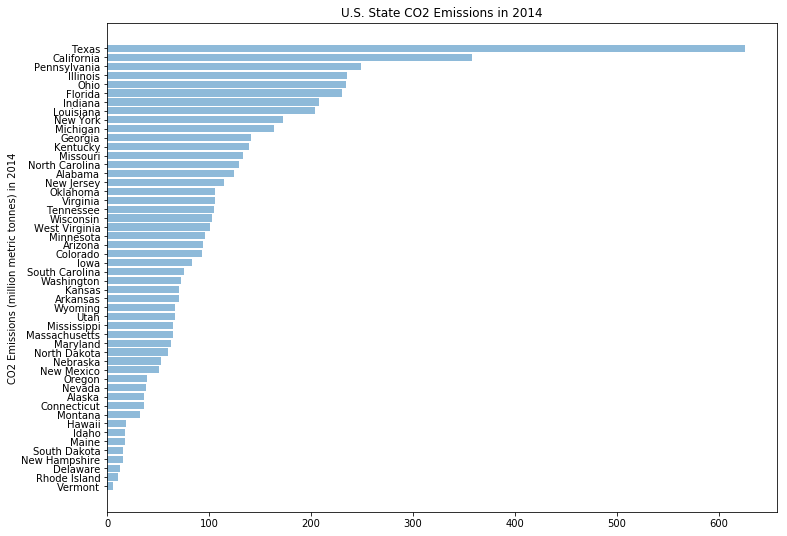

In [17]:
#Plot US CO2 Emissions in 2014 by State
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

States = []
CO2 = []

for state, co2 in sorted_CO2_states_dict: 
    States.append(state)
    CO2.append(co2)

y_pos = np.arange(len(States))

plt.barh(y_pos, CO2, align='center', alpha=0.5)
plt.yticks(y_pos, States)
plt.ylabel('CO2 Emissions (million metric tonnes) in 2014')
plt.title('U.S. State CO2 Emissions in 2014')

plt.show()

##### Discussion: From the above graph, we see that the state of Texas had the highest rate of CO2 emissions in 2014, with approximately 626 million metric tonnes of CO2 emissions. The second highest CO2 emissions in 2014 came from California, and the lowest amount of emissions came from the state of Vermont. 

#### Step \#2: Next, we overlay each state's political affiliation onto their CO2 emissions on the graph:

In [18]:
#Now color code the graph based on the political affiliation of each state: 
state_party_dict = {}
for state in df_party_state.index.values:
    if float(df_party_state.at[state, 'Republican']) > float(df_party_state.at[state, 'Democrat']):
        state_party_dict[state] = 'Republican'
    else:
        state_party_dict[state] = 'Democrat'
        
#print(state_party_dict)
#print(sorted_CO2_states_dict)
        
colors = []
sorted_states_by_CO2 = [state[0] for state in sorted_CO2_states_dict]

for state in sorted_states_by_CO2: 
    if state_party_dict[state] == 'Republican':
        colors.append('red')
    else:
        colors.append('blue')

#print(colors)

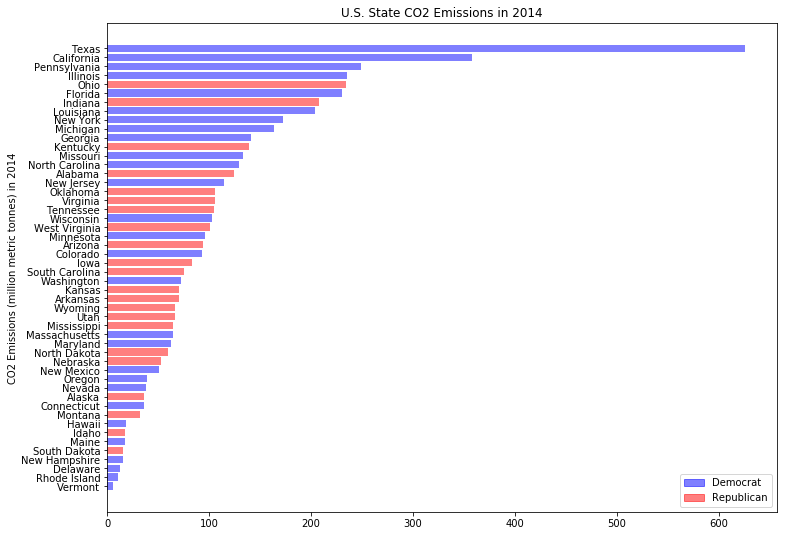

In [19]:


fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

States = []
CO2 = []

for state, co2 in sorted_CO2_states_dict: 
    if state != "District of Columbia":
        States.append(state)
        CO2.append(co2)

y_pos = np.arange(len(States))

plt.barh(y_pos, CO2, align='center', alpha=0.5, color=colors)
plt.yticks(y_pos, States)
plt.ylabel('CO2 Emissions (million metric tonnes) in 2014')
plt.title('U.S. State CO2 Emissions in 2014')

blue_patch = mpatches.Patch(color='blue',alpha=0.5, label='Democrat')
red_patch = mpatches.Patch(color='red', alpha=0.5, label='Republican')

plt.legend(handles=[blue_patch, red_patch])

plt.show()

#### Discussion: In the above graph, blue denotes majority Democratic states while red denotes Republican states in 2014. Here, we see that both the highest 4 and lowest 4  emitters of CO2 are Democratic states, which shows us that there doesn't seem to be a clear correlation between a state's CO2 emissions and their political party affiliation. However, we notice that the states with the largest amounts of CO2 emissions are also the largest states in terms of land area. Therefore, we will perform an analysis that looks at the amount of CO2 released per size of the state, by dividing CO2 emissions by the state's size in sq. miles.

#### Step \#3: Next, we divide each state's CO2 emissions by the size of each state, to get a better idea of the CO2 emission density (since larger states on average emit more CO2): 

In [20]:
#Import a new dataset with state size in sq. miles: 
df_state_size = pd.read_csv("Datasets/2014_State_Size_Population_Density.csv")
df_state_area = df_state_size.drop(["Population", "Density (people per sq mi)"], axis = 1)

##Remove the rankings column
new_land_area = []
for x in df_state_area["Land Area (sq mi)"]:
    text = x.split()
    new_land_area.append(text[0])
      
df_state_area["Land Area (sq mi)"] = new_land_area
df_state_area


##Remove territories that aren't in previous dataset, since they aren't states:
list_not_states = []
for s,a in zip(df_state_area['State'], df_state_area["Land Area (sq mi)"]):
    if s not in States:
        #print(s)
        df_state_area = df_state_area[df_state_area.State != s]

#df_state_area


In [21]:
#Divide CO2 emissions by state size: 
states = df_state_area['State']
areas = df_state_area['Land Area (sq mi)']
states_area_dict = dict(zip(states, areas))

CO2_div_area_states_dict = CO2_states_dict

for state in States: 
    state_area = states_area_dict[state]
    state_area = float(state_area.replace(',', ''))
    CO2_div_area_states_dict[state] = float(CO2_div_area_states_dict[state]/state_area)
    
#CO2_div_area_states_dict

In [22]:
#Sort dictionary by CO2 emissions/state size:
sorted_CO2_div_area_states_dict = sorted(CO2_div_area_states_dict.items(), key=operator.itemgetter(1))
sorted_CO2_div_area_states_dict

#print(sorted_CO2_states_dict)
        
colors = []
sorted_states_by_CO2_div_area = [state[0] for state in sorted_CO2_div_area_states_dict]

for state in sorted_states_by_CO2_div_area: 
    if state_party_dict[state] == 'Republican':
        colors.append('red')
    else:
        colors.append('blue')

#print(colors)

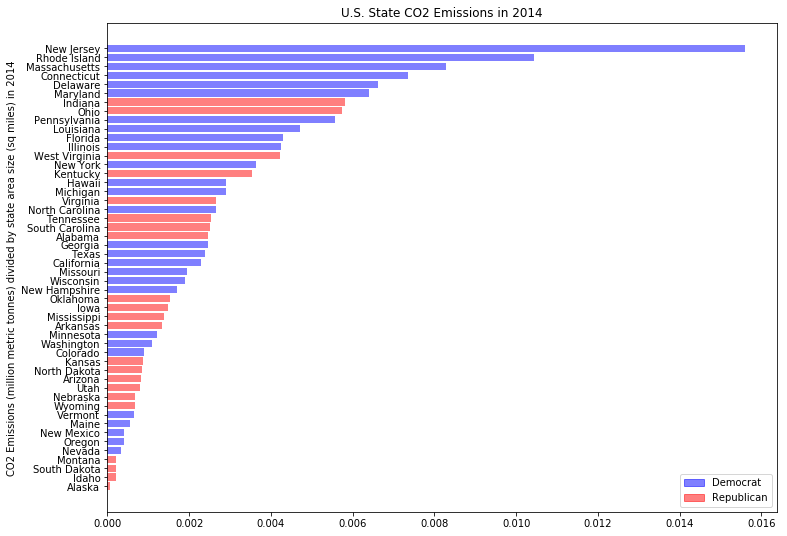

In [23]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

States = []
CO2 = []

for state, co2 in sorted_CO2_div_area_states_dict: 
    if state != "District of Columbia":
        States.append(state)
        CO2.append(co2)
        #CO2.append(math.log(co2*(10**16)))

y_pos = np.arange(len(States))

plt.barh(y_pos, CO2, align='center', alpha=0.5, color=colors)
plt.yticks(y_pos, States)
plt.ylabel('CO2 Emissions (million metric tonnes) divided by state area size (sq miles) in 2014')
plt.title('U.S. State CO2 Emissions in 2014')

blue_patch = mpatches.Patch(color='blue', alpha=0.5, label='Democrat')
red_patch = mpatches.Patch(color='red', alpha=0.5, label='Republican')

plt.legend(handles=[blue_patch, red_patch])

plt.show()

#### Discussion: Here, it seems to be the case that Democratic states are actually releasing more CO2 than Republican states. Let's perform a t-test to analyze whether there is a statistical correlation between a state's political party and their CO2 emissions: 

In [24]:
#To quantify correlation, look at mean and histogram of democratic vs. republican states:
democrat_states = []
democrat_CO2 = []
republican_states = []
republican_CO2 = []
index = 0

for state, CO2 in sorted_CO2_div_area_states_dict: 
    if colors[index] == 'blue':
        democrat_states.append(state)
        democrat_CO2.append(float(CO2))
    else:
        republican_states.append(state)
        republican_CO2.append(float(CO2))
    index = index + 1
        
democrat_CO2 = np.array(democrat_CO2)
republican_CO2 = np.array(republican_CO2)

print("democrat_CO2 mean:", democrat_CO2.mean())
print("republican_CO2 mean:", republican_CO2.mean())

print("\n")

print("democrat_CO2 variance:", democrat_CO2.var())
print("republican_CO2 variance:", republican_CO2.var())


democrat_CO2 mean: 0.00370851643384
republican_CO2 mean: 0.00184687871911


democrat_CO2 variance: 1.19047750798e-05
republican_CO2 variance: 2.72047743304e-06


In [25]:
from scipy import stats
#Perform t-test:

t, two_p =stats.ttest_ind(democrat_CO2, republican_CO2, equal_var = True)
print("\n Statistics: \n")
print("\t t-statistic: ", t)
print("\t two-tailed p-value: ", two_p)

print("\n Results: \n")
if two_p < 0.05: 
    print("\t We reject the null hypothesis that the distributions are the same. A significant difference between \n the two populations was found!")
else:
    print("\t We do not reject the null hypothesis. The two distributions are the same. No significant difference was found.")


 Statistics: 

	 t-statistic:  2.28309040761
	 two-tailed p-value:  0.0268940366189

 Results: 

	 We reject the null hypothesis that the distributions are the same. A significant difference between 
 the two populations was found!


#### Analysis: After doing our t-test, we get a two-tailed p-value of 0.02. Since this is less than the critical value of alpha = 0.05,  we reject the null hypothesis that the two groups' means were the same. This means that Democratic states did signficantly release more carbon dioxide emissions than Republican states in 2014, according to these datasets. 

#### Now, we wonder: Does a state's political party affiliation has any correlation to the state population's awareness and perception of climate change?


#### Step \#4: Load in a dataset of each state's perception of climate change:

In [26]:
df_YPCCC_2014_State_new = df_YPCCC_2014_State_new[df_YPCCC_2014_State_new.Statename != "District of Columbia"]
df_YPCCC_2014_State_new

,Statecode,Statename,TotalPop,happening,human,worried,personal,CO2limits,regulate,fundrenewables
0,AK,Alaska,447543,62,45,48,29,48,67,76
1,AL,Alabama,3166424,56,43,46,31,53,69,73
2,AR,Arkansas,1921039,57,44,47,31,59,71,73
3,AZ,Arizona,4149955,64,49,54,38,64,74,76
4,CA,California,24117317,70,55,62,42,72,79,79
5,CO,Colorado,3328869,66,50,55,36,66,76,78
6,CT,Connecticut,2431340,66,51,56,37,70,78,79
8,DE,Delaware,603331,65,50,55,36,64,77,79
9,FL,Florida,13127624,64,50,54,38,62,75,77
10,GA,Georgia,6242508,63,48,52,36,60,74,75


In [27]:
states = df_YPCCC_2014_State_new["Statename"]

happenings = df_YPCCC_2014_State_new["happening"]
states_happening_dict = dict(zip(states, happenings))

sorted_states_happening_dict = sorted(states_happening_dict.items(), key=operator.itemgetter(1))
#print(sorted_states_happening_dict)
 
sorted_states_happening_colors = []

for state, happening in sorted_states_happening_dict: 
    if state_party_dict[state] == 'Republican':
        sorted_states_happening_colors.append('red')
    else:
        sorted_states_happening_colors.append('blue')

#print(sorted_states_happening_colors)



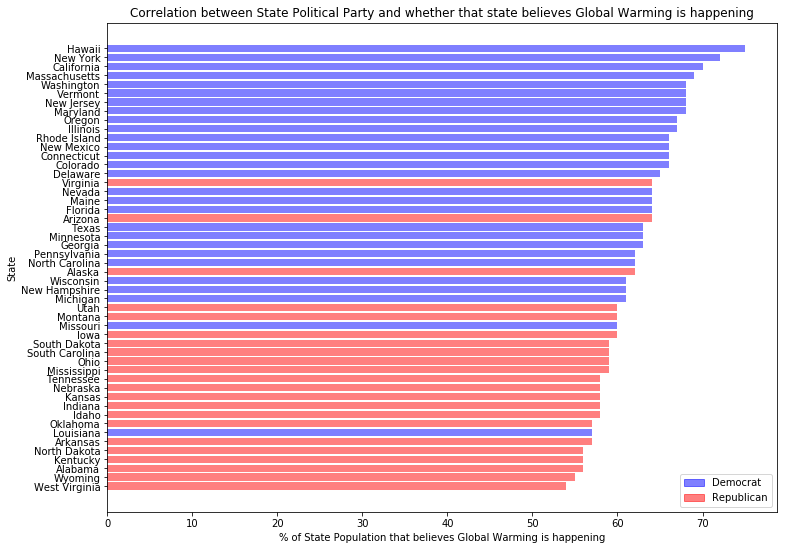

In [28]:

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

States = []
Happening = []

for state, hap in sorted_states_happening_dict: 
    if state != "District of Columbia":
        States.append(state)
        Happening.append(hap)

y_pos = np.arange(len(States))

plt.barh(y_pos, Happening, align='center', alpha=0.5, color=sorted_states_happening_colors)
plt.yticks(y_pos, States)
plt.xlabel('% of State Population that believes Global Warming is happening')
plt.ylabel('State')

plt.title('Correlation between State Political Party and whether that state believes Global Warming is happening')

blue_patch = mpatches.Patch(color='blue', alpha=0.5, label='Democrat')
red_patch = mpatches.Patch(color='red', alpha=0.5, label='Republican')

plt.legend(handles=[blue_patch, red_patch])

plt.show()

#### Discussion: Here, it seems to be the case that Democratic states are more aware that global warming is happening, compared to Republican states. Again, let's perform a t-test to analyze whether there is a statistical correlation between a state's political party and their CO2 emissions: 

In [29]:
#To quantify correlation, look at mean and histogram of democratic vs. republican states:
democrat_states = []
democrat_happening = []
republican_states = []
republican_happening = []
index = 0

for state, hap in sorted_states_happening_dict: 
    if sorted_states_happening_colors[index] == 'blue':
        democrat_states.append(state)
        democrat_happening.append(float(hap))
    else:
        republican_states.append(state)
        republican_happening.append(float(hap))
    index = index + 1
        
democrat_happening = np.array(democrat_happening)
republican_happening = np.array(republican_happening)

print("democrat_happening mean:", democrat_happening.mean())
print("republican_happening mean:", republican_happening.mean())

print("\n")

print("democrat_happening variance:", democrat_happening.var())
print("republican_happening variance:", republican_happening.var())


democrat_happening mean: 65.2142857143
republican_happening mean: 58.5


democrat_happening variance: 14.5255102041
republican_happening variance: 6.25


In [30]:
#Perform t-test:

t, two_p =stats.ttest_ind(democrat_happening, republican_happening, equal_var = False)
print("\n Statistics: \n")
print("\t t-statistic: ", t)
print("\t two-tailed p-value: ", two_p)

print("\n Results: \n")
if two_p < 0.05: 
    print("\t We reject the null hypothesis that the distributions are the same. A significant difference between \n the two populations was found!")
else:
    print("\t We do not reject the null hypothesis. The two distributions are the same. No significant difference was found.")


 Statistics: 

	 t-statistic:  7.3451448811
	 two-tailed p-value:  2.53147455483e-09

 Results: 

	 We reject the null hypothesis that the distributions are the same. A significant difference between 
 the two populations was found!


#### Analysis: Here, we again reject the null hypothesis that the two distributions are the same, which means that there was a statistical correlation between political affiliation and whether or not a population believed global warming was happening in 2014, based on these datasets. From this result, we can say that overall, democratic states are more likely  than populations in republican states to believe that global warming is happening. 


### Conclusion of Analysess: 

#### While Democratic states appear to emit more CO2 than Republican states in 2014, they also appear to be more aware that climate change is happening, which seems contradictory. This causes us to believe that there may be compounding variables that we have not considered in our analysis. What could explain why states who are more aware that global warming is happening still release more carbon dioxide? For future work, we may want to look at a state's GDP as a potential compounding factor. 

# Ethics & Privacy

Common ethical considerations in research include concerns of privacy, consent and
beneficence. Privacy and authorship are ensured in our study as all of the datasets we have
decided to use are publicly available and have been anonymized. These data are mainly about
national carbon emissions and anonymous individual opinions on climate change, which are then
grouped based on their geographic location. The final aima of this research is to promote an
awareness of climate change, which we believe would be advantageous to anyone who could
potentially be affected by this research.

One ethical concern we do have is that in being American and doing this study at a
university in the United States, we inherently bring a western perspective of climate change to the
analysis of other countries. We will need to be mindful of any inherent bias we have with this
perspective, and actively work to mitigate it by understanding that there are geographic and
cultural differences which shape an individual’s perception, awareness of, and response to climate
change. We may be able to avoid this bias by doing qualitative research of climate change
perceptions in various non-Western countries.

# Conclusion & Discussion

*Fill in your discussion information here*